In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [109]:
df=pd.read_csv('train.csv')

In [110]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


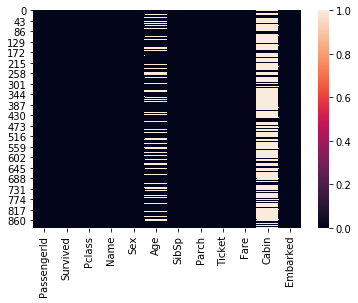

In [111]:
#missing information 
sns.heatmap(df.isnull())

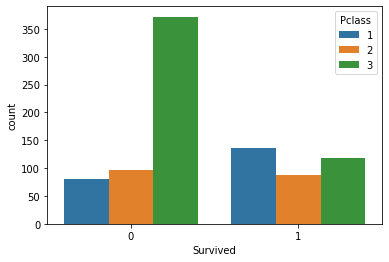

In [112]:
sns.countplot(x='Survived',hue='Pclass',data=df)

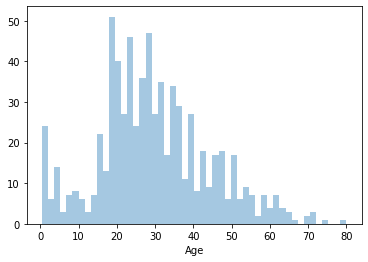

In [113]:
sns.distplot(df['Age'].dropna(),bins=50,kde=False)

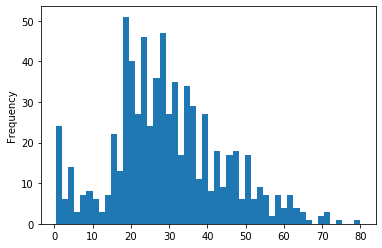

In [114]:
df['Age'].plot.hist(bins=50)

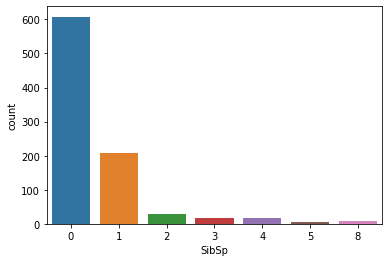

In [115]:
sns.countplot(df['SibSp'])

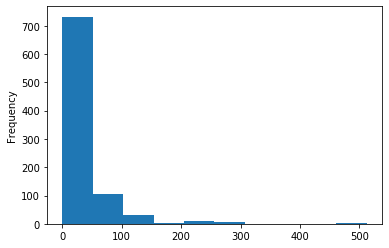

In [116]:
df['Fare'].plot.hist()

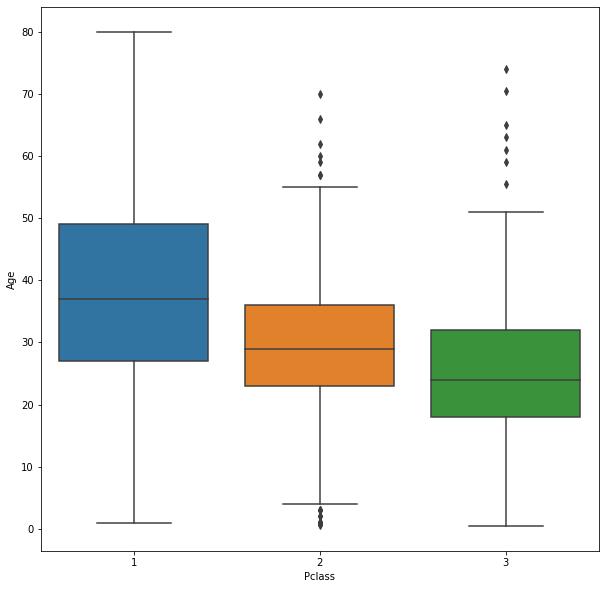

In [117]:
plt.figure(figsize=(10,10))
sns.boxplot(df['Pclass'],df['Age'])

In [118]:
def filling_data(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        elif Pclass==3:
            return 24
    else:
        return Age

In [119]:
df['Age']=df[['Age','Pclass']].apply(filling_data,axis=1)

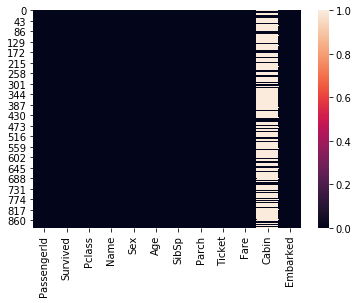

In [120]:
sns.heatmap(df.isnull(),cbar='viridus')

In [121]:
df.drop('Cabin',axis=1,inplace=True)

In [122]:
df.dropna(inplace=True)

In [123]:
SEX=pd.get_dummies(df['Sex'],drop_first=True)

In [124]:
EMBARK=pd.get_dummies(df['Embarked'],drop_first=True)

In [125]:
df=pd.concat([df,SEX,EMBARK],axis=1)

In [126]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [127]:
df.drop(['Name','Sex','Ticket','Embarked','PassengerId'],axis=1,inplace=True)

In [128]:
from sklearn.model_selection import train_test_split

In [139]:
y=df['Survived']
x=df.drop('Survived',axis=1)

In [140]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
model=LogisticRegression()

In [144]:
model.fit(x_train,y_train)

C:\Users\Bhushan Chandan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [145]:
predictions=model.predict(x_test)

In [148]:
from sklearn.metrics import confusion_matrix,classification_report

In [151]:
print(confusion_matrix(y_test,predictions))

[[139  24]
 [ 32  72]]


In [150]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       171
           1       0.69      0.75      0.72        96

    accuracy                           0.79       267
   macro avg       0.77      0.78      0.78       267
weighted avg       0.80      0.79      0.79       267



In [154]:
a=pd.read_csv('BSE_30.csv')

In [155]:
a

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,ADANIPORTS,5/6/2008,150.000000,153.570007,147.820007,151.149994,134.313477,1782030.0
1,ADANIPORTS,5/7/2008,152.000000,154.460007,150.240005,153.309998,136.232864,1180015.0
2,ADANIPORTS,5/8/2008,152.199997,156.759995,150.199997,155.889999,138.525497,1856245.0
3,ADANIPORTS,5/9/2008,155.000000,160.600006,154.210007,156.520004,139.085312,3251375.0
4,ADANIPORTS,5/12/2008,156.000000,163.479996,151.000000,162.500000,144.399170,5031635.0
...,...,...,...,...,...,...,...,...
73311,POWERGRID,4/27/2018,205.100006,208.750000,205.100006,207.800003,207.800003,99047.0
73312,POWERGRID,4/30/2018,207.800003,208.699997,206.800003,207.649994,207.649994,57778.0
73313,POWERGRID,5/2/2018,208.000000,208.949997,204.100006,205.050003,205.050003,103247.0
73314,POWERGRID,5/3/2018,202.500000,207.899994,202.500000,206.550003,206.550003,92484.0
